0.998955283199


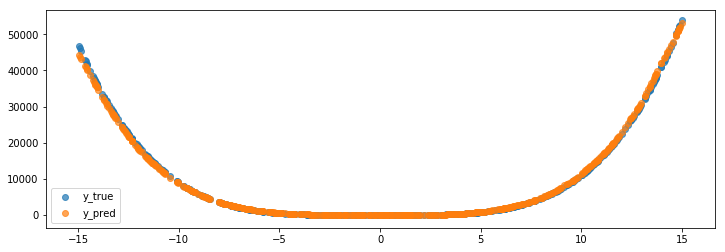

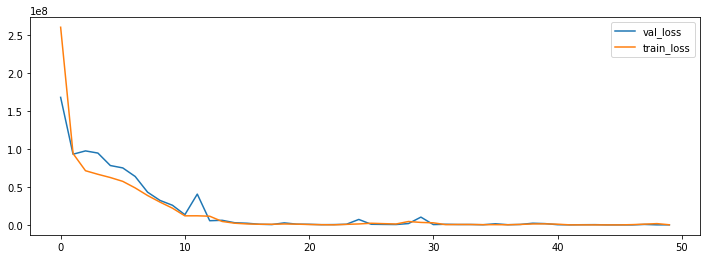

In [93]:
import numpy as np 
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
from keras import metrics

from sklearn.metrics import r2_score

# data genration 
sample_size = 500

x = np.random.uniform(-15, 15, sample_size)
y = x**4 + x**3 + x + np.random.normal(0, 2, sample_size)
####

# neural net modeling 
# 생각보다, fitting하려면 복잡한 모델이 필요합니다. 
model = Sequential([
    Dense(32, kernel_initializer='normal', activation = "relu", input_shape=(1,)), 
    Dense(256, kernel_initializer='normal', activation = "relu"),
    Dense(512, kernel_initializer='normal', activation = "relu"),
    Dense(512, kernel_initializer='normal', activation = "relu"),
    Dense(512, kernel_initializer='normal', activation = "relu"),
    Dense(64, kernel_initializer='normal', activation = "relu"),
    Dense(1, kernel_initializer='normal', activation = "relu"), 
])

model.compile(loss='mean_squared_error', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), 
              metrics=[metrics.mse, metrics.mean_absolute_percentage_error])
####

train_history = model.fit(x, y, epochs=50, batch_size=10, validation_split=0.2, verbose=0)

print(r2_score(y, model.predict(x)))

plt.figure(figsize=(12, 4))
plt.scatter(x, y, alpha=0.7, label='y_true')
plt.scatter(x, model.predict(x), alpha=0.7, label='y_pred')
plt.legend()
plt.savefig('../../assets/images/markdown_img/180608_1330_keras_regression.svg')
plt.show()

train_history.history.keys()

val_loss_lst = train_history.history['val_loss']
train_loss_lst = train_history.history['loss']

plt.figure(figsize=(12, 4))
plt.plot(range(0, len(val_loss_lst)), val_loss_lst, label='val_loss')
plt.plot(range(0, len(train_loss_lst)), train_loss_lst, label='train_loss')
plt.legend()
plt.savefig('../../assets/images/markdown_img/180608_1330_keras_regression_train_val_score.svg')
plt.show()



r2 score of train set: -0.001560175174059708


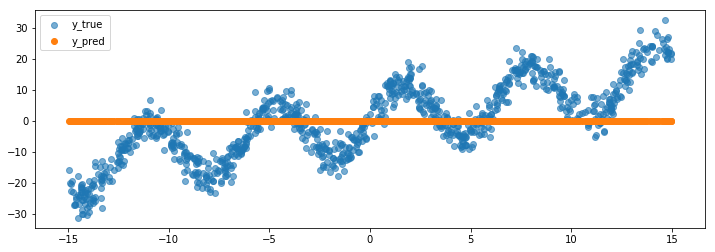

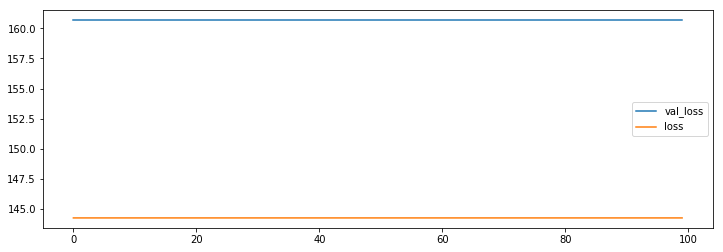

In [96]:
import numpy as np 
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
from keras.initializers import lecun_normal
from keras import metrics

from sklearn.metrics import r2_score

# data generation
sample_size = 1000

a = np.random.uniform(-15, 15, sample_size)
b = np.sin(a)*10 + a + np.random.normal(0, 3, sample_size)
#####

# neural network modeling 
model = Sequential([
    Dense(1024, kernel_initializer=lecun_normal(seed=None), activation = "relu", input_shape=(1,)), 
    Dense(512, kernel_initializer=lecun_normal(seed=None), activation = "relu"),
    Dense(512, kernel_initializer='normal', activation = "relu"),
    Dense(512, kernel_initializer='normal', activation = "relu"),
    Dense(512, kernel_initializer='normal', activation = "relu"),
    Dense(256, kernel_initializer='normal', activation = "relu"),
    Dense(1, kernel_initializer='normal', activation = "relu"),
    
])

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), 
              metrics=[metrics.mse])

train_history = model.fit(a, b, epochs=100, batch_size=200, validation_split=0.2, verbose=0)
####
print("r2 score of train set: {}".format(r2_score(b, model.predict(a))))

plt.figure(figsize=(12, 4))
plt.scatter(a, b, alpha=0.6, label='y_true')
plt.scatter(a, model.predict(a), label='y_pred')
plt.legend()
plt.savefig('../../assets/images/markdown_img/180608_1333_keras_regression_sin.svg')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(range(0, len(train_history.history['val_loss'])), train_history.history['val_loss'], 
         label='val_loss')
plt.plot(range(0, len(train_history.history['val_loss'])), train_history.history['loss'], 
         label='loss')
plt.legend()
plt.savefig('../../assets/images/markdown_img/180608_1333_keras_regression_sin_score.svg')
plt.show()